# Identifying Fake News on Social Media: Topic modelling using LDA

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Load data

In [2]:
# Load data
fake_news = pd.read_csv("Fake.csv")
real_news = pd.read_csv("True.csv")

In [3]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [5]:
real_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
real_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


## Data preprocessing

In [7]:
# Preprocess data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stop words
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [token for token in tokens if not token in stop_words]
    # Stemming
    stemmer = nltk.stem.porter.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens

In [8]:
# Create corpus
corpus = []

for index, row in fake_news.iterrows():
    tokens = preprocess_text(row["text"])
    corpus.append(tokens)

In [9]:
for index, row in real_news.iterrows():
    tokens = preprocess_text(row["text"])
    corpus.append(tokens)

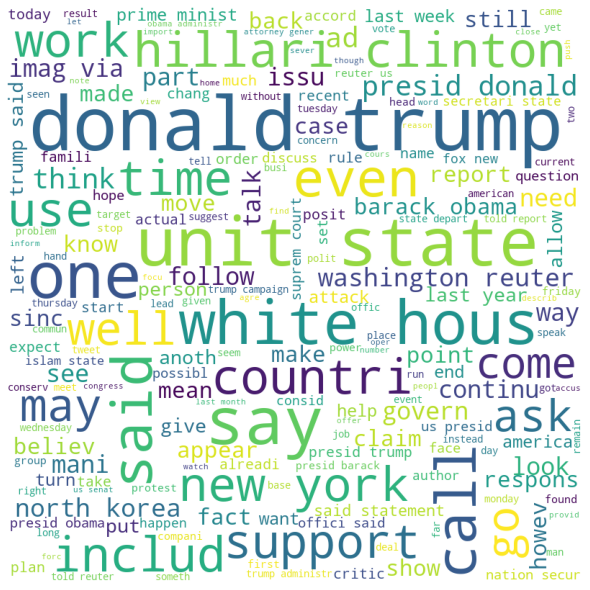

In [10]:

# Join the tokens in the corpus to create a single string
text = ' '.join([word for doc in corpus for word in doc])

# Generate a wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

# Display the wordcloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [11]:
# Create dictionary
dictionary = Dictionary(corpus)

In [12]:
# Filter out words that occur less than 10 times and more than 50% of the documents
dictionary.filter_extremes(no_below=10, no_above=0.5)

In [13]:
# Create bag of words
bow_corpus = [dictionary.doc2bow(text) for text in corpus]

## Training the Model

In [14]:
# Train LDA model
lda_model = LdaModel(bow_corpus, num_topics=10, id2word=dictionary, passes=10)

In [15]:
# Evaluate LDA model using coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=corpus, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4395627082129634


In [16]:
# Calculate log perplexity
log_perplexity = lda_model.log_perplexity(bow_corpus)
print('\nLog Perplexity: ', log_perplexity)


Log Perplexity:  -7.987069525719291


In [17]:
# Print topics
print('\nTopics:')
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))



Topics:
Topic: 0 
Words: 0.012*"state" + 0.010*"us" + 0.009*"govern" + 0.009*"reuter" + 0.008*"unit" + 0.008*"minist" + 0.008*"north" + 0.007*"countri" + 0.007*"korea" + 0.006*"militari"
Topic: 1 
Words: 0.013*"protest" + 0.012*"peopl" + 0.009*"right" + 0.007*"school" + 0.006*"group" + 0.006*"support" + 0.006*"black" + 0.006*"nation" + 0.006*"student" + 0.006*"spain"
Topic: 2 
Words: 0.018*"polic" + 0.016*"court" + 0.010*"attack" + 0.010*"case" + 0.009*"arrest" + 0.009*"offic" + 0.009*"law" + 0.009*"kill" + 0.009*"charg" + 0.008*"state"
Topic: 3 
Words: 0.024*"senat" + 0.022*"republican" + 0.020*"hous" + 0.017*"bill" + 0.012*"democrat" + 0.012*"legisl" + 0.011*"tax" + 0.011*"congress" + 0.010*"lawmak" + 0.009*"plan"
Topic: 4 
Words: 0.012*"media" + 0.010*"report" + 0.008*"news" + 0.007*"polit" + 0.007*"new" + 0.006*"clinton" + 0.006*"million" + 0.006*"corrupt" + 0.005*"year" + 0.005*"public"
Topic: 5 
Words: 0.041*"trump" + 0.009*"like" + 0.009*"go" + 0.008*"say" + 0.008*"think" + 0.0

In [18]:
# Visualize Topics
vis = gensimvis.prepare(lda_model, bow_corpus, dictionary)
pyLDAvis.display(vis)